# Análise dos dados do Airbnb - Roma
*by [Bruno Azambuja](www.brunoazambuja.com)*


<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2019, a Startup fundada 10 anos atrás, já havia **hospedado mais de 500 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

## Roma, capital da Itália



<center><img alt="Roma" width="75%" src="https://astelus.com/wp-content/viajes/Que-ver-en-Roma-1152x759.jpg"></center>

Dentre os dados de algumas das principais cidades disponibilizados pelo Inside Airbnb, Roma foi a cidade escolhida para o desenvolvimento deste projeto, que está entre os locais que mais se atrai visitantes no mundo.

Roma, a capital da Itália, é uma cidade cosmopolita, enorme, com quase 3.000 anos de arte, arquitetura e cultura influentes no mundo todo, nela se encontra obras de arte entre a arquitetura de suas belas ruas, como a Fontana di Trevi, demonstrando ao mundo porque Roma é considerada o **"berço da cultura e da civilização ocidental"**.

Ruínas antigas como o Fórum, o Panteão e o Coliseu evocam o poder do antigo Império Romano. A Cidade do Vaticano, sede da Igreja Católica Romana, tem a Basílica de São Pedro e os museus do Vaticano, que abrigam obras-primas como os afrescos da Capela Sistina de Michelângelo.

<center><img alt="Vatican" width="75%" src="https://i0.wp.com/travelbluebook.com/wp-content/uploads/2015/11/Pantheon-at-Night.jpg?w=1200&ssl=1"></center>

A história de Roma abrange 28 séculos, apesar da mitologia romana data a fundação de Roma por volta de 753 a.C., o local é habitado há muito mais tempo, tornando-se um importante assentamento humano por quase três milênios e uma das mais antigas cidades continuamente ocupadas da Europa.

Eventualmente, a cidade tornou-se sucessivamente a capital do Reino Romano, da República Romana e do Império Romano, sendo considerada por muitos como a primeira cidade e metrópole imperial.

Em 2019, Roma foi a 11ª cidade mais visitada do mundo, com 10,1 milhões de turistas, a **terceira mais visitada na União Europeia** e o destino turístico mais popular da Itália. O seu centro histórico está classificado pela UNESCO como um **Patrimônio Mundial**.

Roma é a sede de várias agências especializadas das Nações Unidas, como a Organização das Nações Unidas para a Alimentação e a Agricultura (FAO), o Programa Alimentar Mundial (PAM) e o Fundo Internacional de Desenvolvimento Agrícola (FIDA), além da presença de renomadas marcas internacionais na cidade, que fez de Roma também um **importante centro de moda e design**, e os estúdios Cinecittà foram cenário de muitos filmes vencedores do Oscar.

Fonte: [wikipedia](https://pt.wikipedia.org/wiki/Roma)

## Premissas estabelecidas para o projeto


 

Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais insights podem ser extraídos a partir de dados brutos.



## Obtenção dos dados


Todos os dados utilizados aqui foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo :

'listings.csv' - Summary information and metrics for listings in Rome (good for visualisations).

In [1]:
# importar os pacotes necessarios
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.image as mpimg
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2022-06-07/visualisations/listings.csv")

## Análise dos dados
Esta etapa tem por objetivo criar uma consciência inicial e permitir um entendimento de como os dados estão estruturados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


### **Identificando a quantidade de atributos (variáveis) e entradas o nosso conjunto de dados possui, assim como quais os tipos das variáveis**

In [4]:
# identificando o volume de dados do DataFrame
print("Entradas/Linhas do dataset:\t {}".format(df.shape[0]))
print("Variáveis/Colunas do dataset:\t {}\n".format(df.shape[1]))

# verificando as entradas do dataset
display(df.dtypes)

Entradas/Linhas do dataset:	 23911
Variáveis/Colunas do dataset:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Verificando e removendo valores ausentes no dataset**

**Tratando os Dados ausentes**

Ao iniciar a análise dos dados ausentes alguns pontos foram considerados como: 

Que tipo de dado está ausente? Em qual proporção? De forma aleatória? 

Todos esses são aspectos que foram levados em consideração ao tratar os dados ausentes. Especialmente em algumas variáveis onde o volume é muito grande e qualquer tipo de preenchimento poderia enviesar os dados de forma que a análise deixasse de ser relevante.

Para outros casos, foram considerados as seguintes hipóteses:

* Excluir
  * Se os dados ausentes estão em pequeno número, ocorrem aleatoriamente, e a ausência não carrega significado, é melhor excluir a linha. No caso da coluna, se ainda for possível analisar alguma parte dela, use-a, como é o caso aqui. Mas para algumas situações, o ideal é excluir a coluna.

* Preencher
  * Preencher as entradas com dados ausentes com valores estatísticos como a média, mediana, moda ou zeros.
  * A média é mais útil quando a distribuição dos dados é normal. Em dados com distribuição mais enviesada (*skewed*), a mediana é uma solução mais robusta, pois ela é menos sensível a outliers.
  * Uma `Regressão Linear` também pode ser útil, apesar de sensível a outliers, podem nos ajudar a inserir valores que nos ajudem.
  * Indentificar a entrada ausente com algum valor que indique isso pode ser mais informativo, quando a ausência representa valor. Por exemplo, em dados numéricos preencher com zero, e em categóricos criar uma categoria "Desconhecido". Atenção, pois os zeros não podem ser levados em consideração em análises estatísticas.



In [5]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.852620
reviews_per_month                 0.164820
last_review                       0.164820
host_name                         0.000209
name                              0.000125
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Considerando os pontos levantados como estratégia de tratamento dos dados ausentes, assim como os dados levantados da quantidade de valores ausentes neste dataset e as suas respectivas relevâncias para os objetivos propostos neste projeto, optou-se pela exclusão das colunas `neighbourhood_group`, `last_reviews` e `license`.

Para a coluna `reviews_per_month` foi realizado o preenchimento dos valores ausentes pela mediana da sua respectiva coluna.

Já para os valores ausentes do `host_name`e `name` optou-se pela exclusão destas linhas.

In [6]:
# convertendo os tipos de dados das colunas
df[['price','latitude', 'longitude','reviews_per_month']] = df[['price','latitude', 'longitude', 'reviews_per_month']].astype('float')

# excluindo as colunas com os dados faltantes e não relevante
df.drop(columns=['neighbourhood_group', 'license', 'last_review'], inplace=True)

# preenchendo os valores ausentes da coluna com a mediana
rpm_median = df.reviews_per_month.median()
df.fillna({"reviews_per_month": rpm_median}, inplace=True)

# excluindo as entradas com dados faltantes
df.dropna(axis=0, inplace=True)

Verificando o tratamento dos valores ausentes do dataset

In [7]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

In [8]:
# identificando o volume de dados do DataFrame
print("Entradas/Linhas:\t {}".format(df.shape[0]))
print("Variáveis/Colunas:\t {}\n".format(df.shape[1]))

Entradas/Linhas:	 23903
Variáveis/Colunas:	 15



Como pode ser visto todos os valores ausentes foram removidos do dataset, preservando de forma significativa o montante de dados disponibilizados inicialmente.

Desta forma o tratamento dos dados ausentes alcançou o objetivo proposto, preservando os dados para que se possa tirar os insights desejados neste projeto.

### **Identificando e retirando outliers presentes no dataset?**

*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

IQR = Q3 - Q1
Vamos dar uma olhada nos nossos dados e ver o que identificamos.

In [9]:
# verificando a distribuição estatística
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.390300e+04,23903.0,23903.0,23903.0,23903.0,23903.0,23903.0,23903.0,23903.0,23903.0,23903.0
mean,4.826547e+16,115330654.9,41.9,12.5,166.6,3.7,47.3,1.2,7.7,184.9,9.8
std,1.626712e+17,128765031.9,0.0,0.1,846.5,19.3,77.3,1.3,21.5,119.8,16.9
min,2.737000e+03,1944.0,41.6,12.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,1.230434e+07,14450199.0,41.9,12.5,65.0,1.0,2.0,0.4,1.0,77.0,0.0
50%,2.845001e+07,52939240.0,41.9,12.5,100.0,2.0,13.0,0.9,3.0,201.0,2.0
75%,4.459890e+07,193726881.0,41.9,12.5,157.0,3.0,58.0,1.7,6.0,293.0,13.0
max,6.439834e+17,462720142.0,42.1,12.8,90963.0,1000.0,918.0,30.0,192.0,365.0,889.0


Aqui, algumas coisas já chamam a nossa atenção, como por exemplo:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o Q3 está em 157 dólares, mas o máximo está em 90 mil dólares. Claramente, há outliers por aqui.
* A variável `minimum_nights` tem como seu máximo o valor 1000, sendo que o Q3 está em 3. Claramente temos outliers nessa variável.
* As variáveis `number_of_reviews`, `reviews_per_month` e `calculated_host_listings_count` também podem conter outliers, mas não vamos nos preocupar com elas agora.

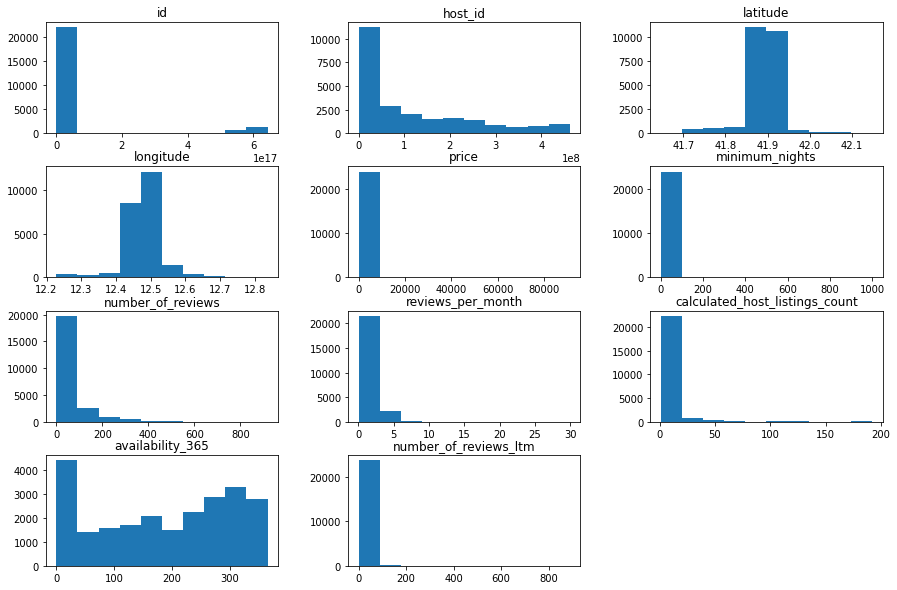

In [10]:
# verificando as distribuições
df.hist(figsize=(15,10), grid=False);

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas;
* Calcular o IQR para as variáveis;
* Definir o limite superior e inferior para cortar os outliers;
* Remover os outliers;
* Visualizar e analisar novamente os dados tratados.

**Definindo o Q1 e Q3 para as variáveis que serão limpas, calculando o IQR para as variáveis e definindo o limite superior e inferior para cortar os outliers das variáveis `price` e `minimum_nights`**

In [11]:
# identificando os outliers para a variável Price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites para a variável Price            
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  92.0
Limite superior de price:  295.0
Limite inferior de price:  -73.0


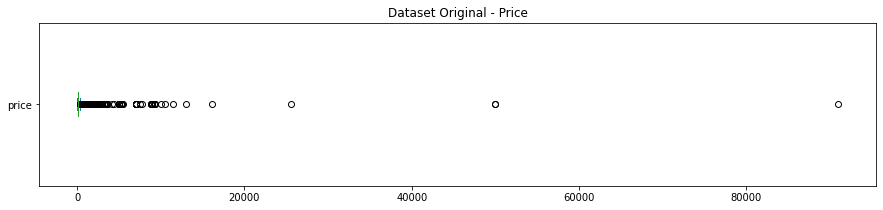

O dataset possui total de 23903 entradas.
A coluna Price possui 2020 entradas acima de 295.0.
Isto representa 8.45% do dataset.


In [12]:
# verificando o conjunto original da variável price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Price')
plt.show()
print("O dataset possui total de {} entradas.".format(df.shape[0]))
print("A coluna Price possui {} entradas acima de 295.0.".format(len(df[df.price > 295.0])))
print("Isto representa {:.2f}% do dataset.".format((len(df[df.price > 295.0]) / df.shape[0])*100))

In [13]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites para a variável Price                                              
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


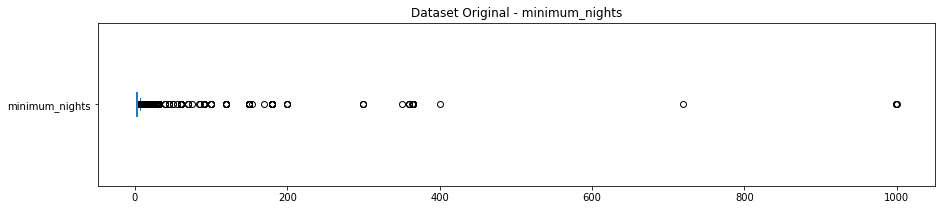

O dataset possui total de 23903 entradas.
A coluna minimum_nights possui 1136 entradas acima de 6.0.
Isto representa 4.75% do dataset.


In [14]:
# verificando o conjunto original da variável minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui total de {} entradas.".format(df.shape[0]))
print("A coluna minimum_nights possui {} entradas acima de 6.0.".format(len(df[df.minimum_nights > 6.0])))
print("Isto representa {:.2f}% do dataset.".format((len(df[df.minimum_nights > 6.0]) / df.shape[0])*100))

Como podemos ver na variável `price`, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos tratar os dados que estão acima dos limites superiores calculados para `price` e `minimum_nights`assim com os valores que apresentam zero para `price`.

**Removendo os outliers das variáveis `price` e `minimum_nights`**

In [15]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 295.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (23903, 15)
Shape após a limpeza:  (20817, 15)


**Visualizando e analisando os dados tratados**

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

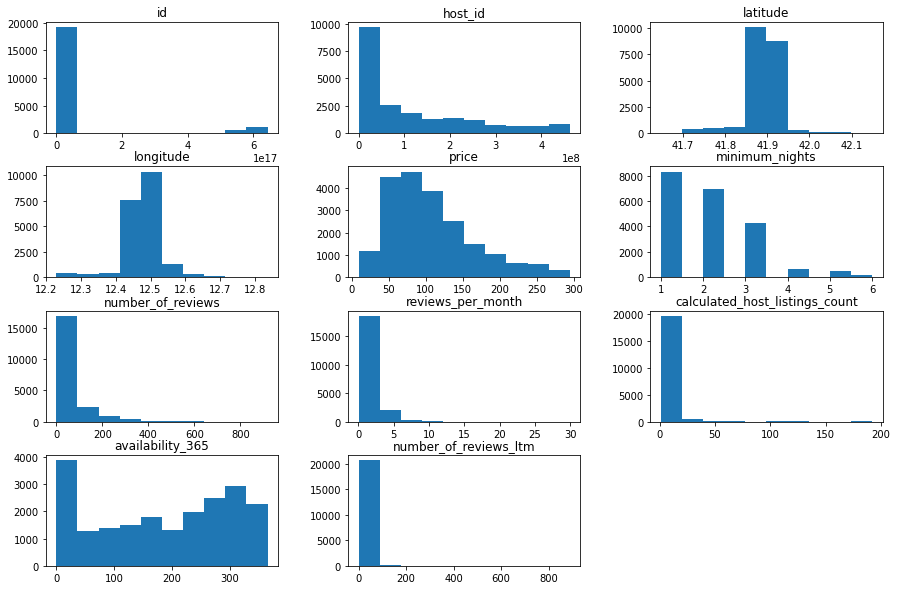

In [16]:
# verificando as distribuições
df_clean.hist(figsize=(15,10), grid=False);

In [17]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.081700e+04,20817.0,20817.0,20817.0,20817.0,20817.0,20817.0,20817.0,20817.0,20817.0,20817.0
mean,4.838581e+16,116229104.7,41.9,12.5,108.0,2.0,50.4,1.3,7.0,183.0,10.6
std,1.627934e+17,129129200.3,0.0,0.1,58.6,1.0,80.2,1.4,18.8,119.5,17.5
min,1.183400e+04,1944.0,41.6,12.2,9.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,1.218790e+07,14679174.0,41.9,12.5,65.0,1.0,2.0,0.4,1.0,74.0,0.0
50%,2.817328e+07,54585363.0,41.9,12.5,95.0,2.0,15.0,0.9,2.0,198.0,3.0
75%,4.454572e+07,195632120.0,41.9,12.5,140.0,3.0,63.0,1.8,5.0,291.0,14.0
max,6.439584e+17,462720142.0,42.1,12.8,295.0,6.0,918.0,30.0,192.0,365.0,889.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana das variáveis `price` e `minimum_nights` foram pouquíssimas afetadas pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes;
* A média da variável `price` e `minimum_nights` foram reduzidas drasticamente, enfatizando a sensibilidade desse atributo em relação aos outliers;
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.

### **Tipo de imóvel mais alugado do Airbnb em Roma**

Os anfitriões do Airbnb podem listar casas/apartamentos inteiros, quartos privados, compartilhados e, mais recentemente, quartos de hotel.

Dependendo do tipo de quarto e atividade, uma listagem residencial do Airbnb poderia ser mais como um hotel, disruptiva para os vizinhos, tirando moradias e ilegalmente.

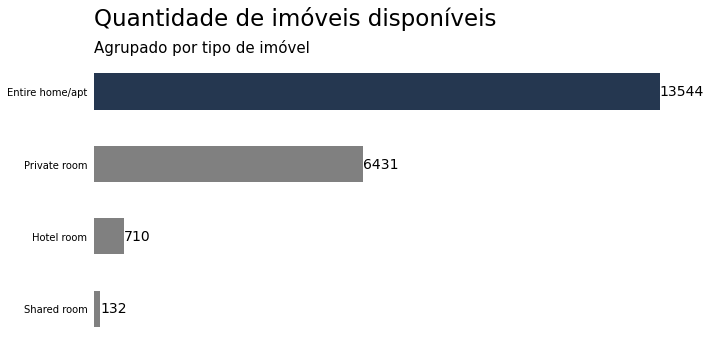

In [18]:
# agrupando quantidade de cada tipo de imóveis e classificando
y = df_clean.room_type.value_counts().sort_values()

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(10,5))
y.plot(y=y, kind="barh", ax=ax, color=["gray","gray","gray","#253750"])
plt.title("Quantidade de imóveis disponíveis", fontsize=23, pad=30, loc="left")
plt.suptitle("Agrupado por tipo de imóvel", fontsize=15, x=0.135, y=0.88, ha="left")

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado gráfico
fig.tight_layout()
plt.show()

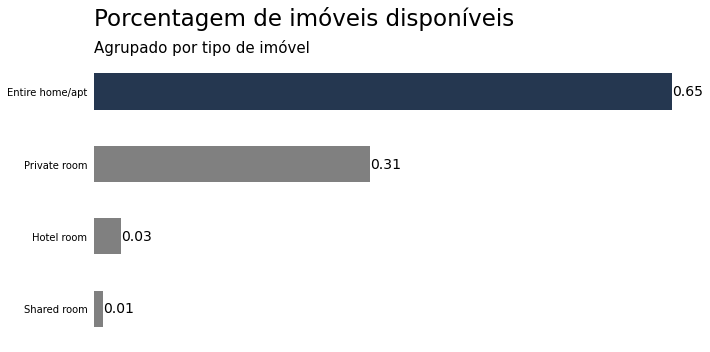

In [19]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = (df_clean.room_type.value_counts().sort_values()/ df_clean.shape[0])

# arredondando valores
y = round(y, 2)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(10,5))
y.plot(y=y, kind="barh", ax=ax, color=["gray", "gray", "gray", "#253750"])
plt.title("Porcentagem de imóveis disponíveis", fontsize=23, pad=30, loc="left")
plt.suptitle("Agrupado por tipo de imóvel", fontsize=15, x=0.135, y=0.88, ha="left")

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
fig.tight_layout()
plt.show()

### **Média dos preços de aluguel por tipo de imóvel**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos agrupar `room_type` e calcular a média de valores para cada tipo de imóvel, usando o método `groupby()` e o `mean()`.

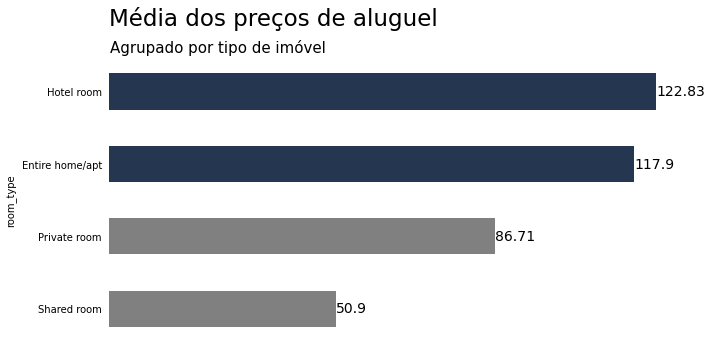

In [20]:
# média de preço para cada tipo de imóveis e classificando
y_price = df_clean.groupby('room_type').price.mean().sort_values()

# arredondando valores
y_price = round(y_price, 2)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(10,5))
y_price.plot(y=y_price, kind="barh", ax=ax, color=["gray", "gray", "#253750", "#253750"])
plt.title("Média dos preços de aluguel", fontsize=23, pad=30, loc="left")
plt.suptitle("Agrupado por tipo de imóvel", fontsize=15, x=0.158, y=0.88, ha="left")

# adicionando valores nas barras
for index, value in enumerate(y_price): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
fig.tight_layout()
plt.show()

### **Qual a localidade mais cara do Airbnb em Roma?**



Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

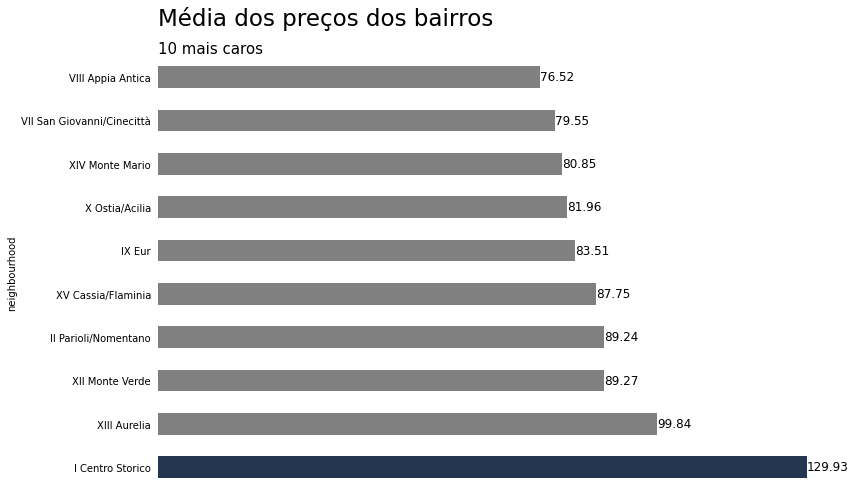

In [21]:
# média de preço dos 10 bairros mais caros
y_neighbourhood = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

# arredondando valores
y_neighbourhood = round(y_neighbourhood, 2)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(12,7))
y_neighbourhood.plot(y=y_neighbourhood, kind="barh", ax=ax, color=["#253750", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray"])
plt.title("Média dos preços dos bairros", fontsize=23, pad=30, loc="left")
plt.suptitle("10 mais caros", fontsize=15, x=0.1876, y=0.910, ha="left")

# adicionando valores nas barras
for index, value in enumerate(y_neighbourhood): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=12) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado gráfico
fig.tight_layout()
plt.show()

In [22]:
df_clean['neighbourhood'].unique()

array(['XV Cassia/Flaminia', 'VI Roma delle Torri', 'X Ostia/Acilia',
       'VII San Giovanni/Cinecittà', 'IV Tiburtina', 'III Monte Sacro',
       'VIII Appia Antica', 'IX Eur', 'XII Monte Verde',
       'XI Arvalia/Portuense', 'XIV Monte Mario', 'XIII Aurelia',
       'I Centro Storico', 'II Parioli/Nomentano',
       'V Prenestino/Centocelle'], dtype=object)

Acima, vemos que o bairro `I Centro Storico` apresenta uma média de preço bem superior aos demais lugares.

Verificando sites especializados para buscar uma explicação para tal diferença, foi possível verificar no site [Buenasdicas]('https://www.buenasdicas.com/onde-ficar-em-roma-6597/'), que este bairro apresenta maior concentração de pontos turístico, o que nos leva à entender o porquê desta discrepância de preço no Airbnb.

### **Frequência de minimum_nights para cada categoria de dias?**

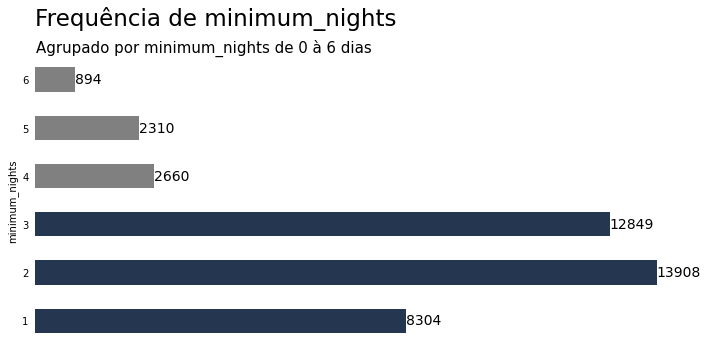

In [23]:
# ver a média da coluna `minimum_nights``
y_minimum = df_clean.groupby('minimum_nights').minimum_nights.sum()

# arredondando valores
y_minimum = round(y_minimum, 0)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(10,5))
y_minimum.plot(x=y_minimum, kind="barh", ax=ax, color=["#253750", "#253750", "#253750", "gray", "gray", "gray", "gray"])

plt.title("Frequência de minimum_nights", fontsize=23, pad=30, loc="left")
plt.suptitle("Agrupado por minimum_nights de 0 à 6 dias", fontsize=15, x=0.055, y=0.88, ha="left")

# adicionando valores nas barras
for index, value in enumerate(y_minimum): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
fig.tight_layout()
plt.show()

Como pode-se observar, a quantidade mais frequente de `minimum_nights` dentre os imóveis disponíveis no Airbnb são de 2 dias, 3 dias e 1 dia. Ou seja, dentre diversos imóveis listados no dataset, estes dias listados anteriormente serão os mais frequente no momento da seleção.

### **Verificando correlações existentes entre as variáveis do dataset**

**Correlação** significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

Antes de efetivamente verificar as correlações, vamos simplificar esta tarefa, unindo informações e removendo as informações redundantes como número de avaliações que possue três métricas relativamente parecidas.

A seguir, unimos as métricas latitude e longitude em uma só métrica que é a distância ao centro de Roma.

In [24]:
# Calculando a latitude média da região central
latitude_centro = df_clean[df_clean['neighbourhood'] == 'I Centro Storico'].latitude.mean()

# Calculando a longitude média da região central
longitude_centro = df_clean[df_clean['neighbourhood'] == 'I Centro Storico'].longitude.mean()

# Calculando a distância euclidiana das coordenadas médias das locações da região central
df_clean['distancia_centro'] = (df_clean['latitude'] - latitude_centro)**2 + (df_clean['longitude'] - longitude_centro)**2

Vamos criar uma matriz que demonstra a correlação entre as variévais definidas.

In [25]:
# criar uma matriz de correlação
corr = df_clean[[
    'price',
    'minimum_nights', 
    'number_of_reviews',
    'calculated_host_listings_count', 
    'availability_365', 
    'distancia_centro'
    ]].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distancia_centro
price,1.000000,-0.012207,-0.036731,0.157344,0.175415,-0.154061
minimum_nights,-0.012207,1.000000,0.064948,-0.064766,-0.081755,-0.048229
number_of_reviews,-0.036731,0.064948,1.000000,-0.060909,0.009549,-0.118340
calculated_host_listings_count,0.157344,-0.064766,-0.060909,1.000000,-0.005205,-0.046816
availability_365,0.175415,-0.081755,0.009549,-0.005205,1.000000,0.042452
distancia_centro,-0.154061,-0.048229,-0.118340,-0.046816,0.042452,1.000000


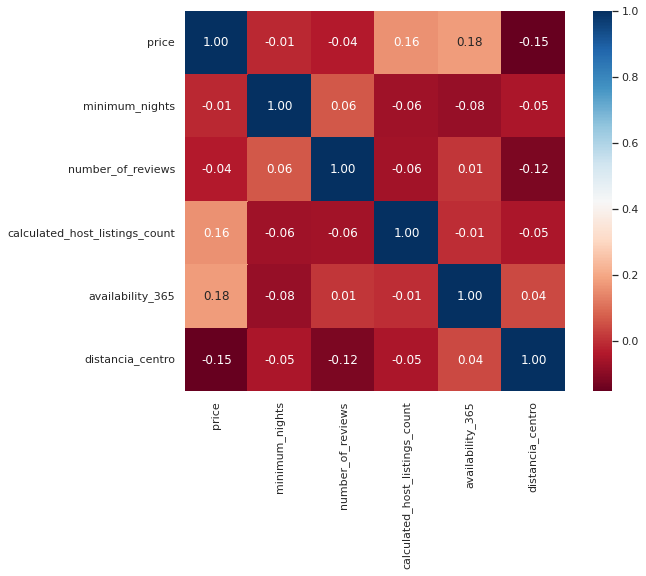

In [26]:
# plotar um heatmap a partir das correlações
sns.set(rc = {'figure.figsize':(10,7)})
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A maior correlação encontrada com relação à variável alvo foi de 0.18 que é uma correlação entre número de dias de disponibilidade dentro de 365 dias que o locatário tem no dataset e o preço. 

A segunda maior correlação encontrada com relação à variável alvo foi de 0.16 que é uma correlação entre a quantidade de imóveis do mesmo anfitrião e o preço.

Outra correlação encontrada é a relação da distância do centro com o preço, que apresentou valor -0.15, o que indica que quanto maior a distância ao centro menor tende a ser o preço, as demais correlações encontradas com a variável alvo são pouco relevantes.


### **Visualização do dataset em mapas**

Folium é uma biblioteca que permite visualizações interativas de mapas em Python, com esta biblioteca vamos examinar algumas características do dataset de Roma disponibilidado pelo Airbnb.

Primeiramente vamos carregar nossos dados e examiná-los brevemente, como fizemos antes.

In [27]:
# carregando os dados
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distancia_centro
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,XV Cassia/Flaminia,42.07605,12.32067,Private room,66.0,1,0,0.86,3,88,0,0.056669
1,41146116,Il Giardino di Veio,322089651,Rosetta,XV Cassia/Flaminia,42.05088,12.45619,Private room,20.0,2,1,0.03,1,0,0,0.023635
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,VI Roma delle Torri,41.82882,12.73900,Private room,100.0,1,0,0.86,1,180,0,0.072128
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110.0,3,53,0.63,4,289,3,0.079660
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,XV Cassia/Flaminia,42.06512,12.46106,Private room,25.0,1,12,0.19,3,315,3,0.027959


**HeatMap**

Para uma melhor compreensão da densidade de listagens, podemos usar o mapa de calor folium.

In [28]:
# plotando o mapa
map_folium = folium.Map([41.8940108,12.3968282],zoom_start=10)
HeatMap(df_clean[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

Do mapa acima, podemos ver claramente onde está localizada a lista mais densa, mostrada pela cor vermelha na área central. A densidade de listagem diminui cada vez mais, quanto mais está mais distante da região central.

**Fast Marker Cluster**



In [29]:
coord = df_clean.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,20817.000000,20817.000000
mean,12.479383,41.890748
std,0.054558,0.040893
min,12.228270,41.646860
25%,12.460903,41.885490
50%,12.477540,41.896440
75%,12.503900,41.906120
max,12.837450,42.148796


Abaixo, você pode ver que a maioria dos anúncios estão no centro da cidade. Este mapa é interativo e você pode ampliar os clusters para encontrar os locais individuais das listagens.

In [30]:
# plotando o mapa
lats = df_clean['latitude'].tolist()
lons = df_clean['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[41.8940108,12.3968282], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map1)
map1

**Price Map**

Em seguida, visualizamos o mapa de gráfico de dispersão de cada listagem e a diferença na faixa de preço usando pontos de longitude e latitude com um mapa de calor de preço.


In [31]:
# import our image 
rome_img = mpimg.imread('/content/rome.png')
# plot the data
ax = df_clean.plot(
    kind="scatter", 
    x='longitude', 
    y='latitude', 
    figsize=(20,8),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(rome_img, extent=[12.115064, 12.744020, 41.717653, 41.995721], alpha=1.0)            
# add axis labels
plt.ylabel("Latitude", fontsize=10)
plt.xlabel("Longitude", fontsize=10)
# set the min/max axis values - these must be the same as above
plt.xlim(12.115064, 12.744020)
plt.ylim(41.717653, 41.995721)
plt.legend(fontsize=10)
plt.show()

FileNotFoundError: ignored

Acima, pode-se ver que o preços mais altos dos anúncios estão mais concentrado no centro da cidade.

## Conclusões


### **REVISAR A CONCLUSÃO**


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.